In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 활성화 함수

### 계단 함수

In [2]:
# 이 계단 함수는 x 값으로 실수만 가능 (numpy 배열 안됨)
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0    

In [3]:
# numpy 배열 지원 계단 함수
def step_function(x):
    y = x > 0
    return y.astype(np.int32)

In [4]:
a = np.array([-1., 1., 0., 2.])
b = step_function(a)
print(b)

[0 1 0 1]


In [5]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

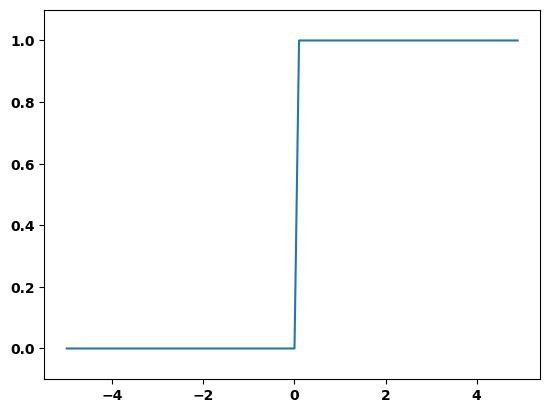

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수
S자 형태의 그래프

In [7]:
def sigmoid(x):
    # 로지스틱 함수
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

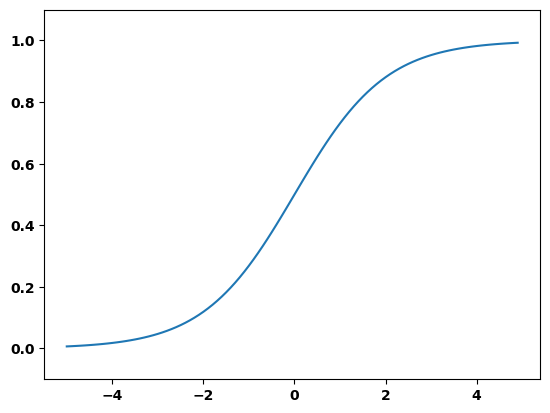

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU 함수

In [10]:
def relu(x):
    return np.maximum(0, x)

## 다차원 배열 계산

In [11]:
# 행렬 계산은 np.dot()을 이용하면 쉽게 된다.
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])

np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 신경망에서의 행렬 곱

In [12]:
X = np.array([1, 2])                    # 입력 값
W = np.array([[1, 3, 5], [2, 4, 6]])    # 가중치
Y = np.dot(X, W)                        # 출력
print(Y)

[ 5 11 17]


## 3층 신경망 구현

$w_{12}^{(1)}$ 표기 $^{(1)}$은 1층의 가중치임을 나타내고, $_{12}$의 $_1$은 다음 층의 1번째 뉴런임을 $_2$는 앞 층의 2번째 뉴런임을 나타낸다.

In [13]:
# 입력 -> 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2,)
(2, 3)
(3,)


활성화 함수는 시그모이드 함수를 사용하고 z=h(a) 로 표현한다.

In [14]:
# 1층 활성화 함수
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [15]:
# 1층 -> 2층, 활성화 함수
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [16]:
# 2층 -> 출력층
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # Y = A3
# 맥락을 맞추기 위해 쓴 항등 함수

In [17]:
# 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


함수 이름이 forward인 것은 신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 알리기 위함이다. 뒤에서 신경망 학습을 다룰 때 역방향(backward, 출력에서 입력 방향)처리에 대해서 살펴볼 것이다.

## 출력층 설계
신경망은 분류와 회귀 모두에 이용가능하다. 둘 중 어떤 것이냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀엔 항등 함수, 분류엔 소프트맥스 함수를 사용한다.

### 항등 함수와 소프트맥스 함수

In [18]:
# 항등 함수
def identity_function(x):
    return x

# 소프트맥스 함수
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

소프트맥스함수에서 입력값이 크면 오버플로우가 일어나 제대로된 결과값이 나오지 않는다. 따라서 개선된 소프트맥스 함수를 쓴다.

### 개선된 소프트맥스 함수

In [19]:
def softmax(a):
    c = np.max(c)
    exp_a = np.exp(a - c) # 오버플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

소프트맥스 함수의 특징은 출력의 총합이 1이 된다는 점이다. 출력을 `확률`로 해석할 수 있다. 이용하면 문제를 확률적(통계적)으로 대응할 수 있게 된다.

## 손글씨 숫자 인식

### MNIST 데이터셋

In [2]:
# 데이터셋 불러오기
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [35]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


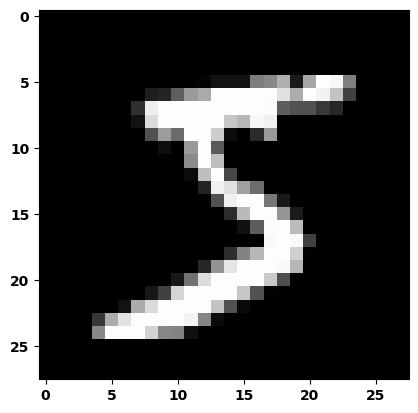

In [3]:
import matplotlib.pyplot as plt

img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

### 신경망 추론 처리

In [44]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("./sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [47]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 배치 처리

In [48]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
